
<h2 id="Volatility">Volatility<a class="anchor-link" href="#Volatility">¶</a></h2><p>Asset price volatility is central to derivatives pricing. It is defined as measure of price variability over certain period of time. In essence, it describes standard deviation of returns. There are different types of volatility: Historical, Implied, Forward. In most cases, we assume volatility to be constant, which is clearly not true and numerous studies have been dedicated to estimate this variable, both in academia and industry.</p>
<p>Volatility estimation by statistical means assume equal weights to all returns measured over the period. We know that over 1-day, the mean return is small as compared to standard deviation. If we consider a simple <em>m</em>-period moving average, where $\sigma_n$ is the volatility of return on day n, then with $\overline u$ $\approx$ 0, we have <br/><br/></p>
$$ \sigma^2_n = \frac 1 m \sum_{i=1}^m u^2_{n-i} $$<p>where, $u$ is return and $\sigma^2$ is the variance.</p>
<p>However, any large return within this <em>n</em> period will elevate the volatility until it drops out of the sample. Further, we observe volatility is mean reverting and tends to vary about a long term mean. To address this effect, we adopt to the weighting schemes.<br/><br/></p>
$$ \sigma^2_n = \omega + \sum_{i=1}^m \alpha_i u^2_{n-i} $$<p>where, $\omega = \gamma \overline \sigma^2$ and weights must sum to 1.</p>
<p>This is known as <strong>Autoregressive Conditional Heteroscedastic</strong> model.</p>
<h2 id="ARCH">ARCH<a class="anchor-link" href="#ARCH">¶</a></h2><p><strong>Autoregressive</strong> models are a statistical technique involving a regression of lagged values where the model suggests that past values can help forecast future values of the same variable. Within the model, a time series is the dependent variable and lagged values are the independent variables.</p>
<p>The ARCH model, was originally developed by Robert Engle in 1982 to measure the dynamics of inflation uncertainty. <strong>Conditional heteroskedasticity</strong> refers to the notion that the next period’s volatility is conditional on the volatility in the current period as well as to the time varying nature of volatility. However, given the volatility dynamics, this model fail to fully capture the persistence of volatility.</p>
<h2 id="GARCH">GARCH<a class="anchor-link" href="#GARCH">¶</a></h2><p>To address the shortcoming, ARCH has been extended to a generalised framework where we add volatility as a forecasting feature by adding previous variance. This method is popularly known as <strong>Generalized ARCH</strong> or <strong>GARCH</strong> model.<br/><br/></p>
$$ \sigma^2_n = \omega + \sum_{i=1}^p \alpha_i u^2_{n-i} + \sum_{i=1}^q \beta_i \sigma^2_{n-i} $$<p>where, $p$ and $q$ are lag length.</p>
<p><strong>GARCH(1,1)</strong> is then represented as,</p>
$$ \sigma^2_n = \omega + \alpha u^2_{n-i} + \beta \sigma^2_{n-i} $$<p><br/></p>
<p>where, $\alpha + \beta < 1$ and $\gamma + \alpha + \beta = 1$ as weight applied to long term variance cannot be negative.</p>
<p>The GARCH model is a way of specifying the dependence of the time varying nature of volatility. The model incorporates changes in the fluctuations in volatility and tracks the persistence of volatility as it fluctuates around its long-term average and are exponentially weighted.</p>
<p>To model GARCH or the conditional volatility, we need to derive $\omega$, $\alpha$, $\beta$ by maximizing the likelihood function.</p>



<h3 id="Import-Libraries">Import Libraries<a class="anchor-link" href="#Import-Libraries">¶</a></h3>


In [1]:
import pandas as pd
import numpy as np

from scipy.stats import norm
from scipy.optimize import minimize

import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 16, 8

import warnings
warnings.filterwarnings('ignore')


<h3 id="Retrieve-Data">Retrieve Data<a class="anchor-link" href="#Retrieve-Data">¶</a></h3><p>We will use the FAANG stocks as before to build for calculation of VaR</p>


In [4]:
# Load locally stored data
df = pd.read_csv('vol.csv', parse_dates=True, index_col=0, dayfirst=True)

# Check first 5 values 
df.head()

,VIX,S&P 500
DATE,,
1990-01-02,18.19,386.162
1990-01-03,18.19,385.171
1990-01-04,19.22,382.018
1990-01-05,20.11,378.299
1990-01-08,20.26,380.039


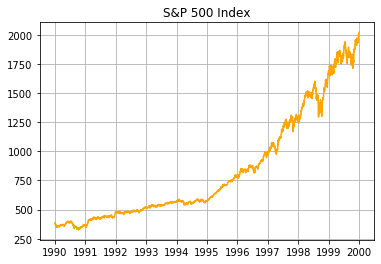

In [5]:
# Visualize FTSE 100 Index Price
plt.plot(df['S&P 500'], color='orange')
plt.title('S&P 500 Index')
plt.grid(True)


<h3 id="Calculate-Log-Returns">Calculate Log Returns<a class="anchor-link" href="#Calculate-Log-Returns">¶</a></h3>


In [6]:
# Calculate daily returns
returns = np.log(df['S&P 500']).diff().fillna(0)

In [7]:
returns

DATE
1990-01-02    0.000000
1990-01-03   -0.002570
1990-01-04   -0.008220
1990-01-05   -0.009783
1990-01-08    0.004589
1990-01-09   -0.011845
1990-01-10   -0.006617
1990-01-11    0.003508
1990-01-12   -0.024811
1990-01-15   -0.008657
1990-01-16    0.011113
1990-01-17   -0.009840
1990-01-18    0.002336
1990-01-19    0.002866
1990-01-22   -0.026096
1990-01-23    0.003722
1990-01-24   -0.022498
1990-01-25    0.005949
1990-01-26   -0.000768
1990-01-29   -0.001634
1990-01-30   -0.006596
1990-01-31    0.018714
1990-02-01   -0.000732
1990-02-02    0.006614
1990-02-05    0.003527
1990-02-06   -0.006258
1990-02-07    0.012528
1990-02-08   -0.002314
1990-02-09    0.002439
1990-02-12   -0.010304
                ...   
1999-11-18    0.010089
1999-11-19   -0.002064
1999-11-22   -0.000733
1999-11-23   -0.011491
1999-11-24    0.008826
1999-11-26   -0.000253
1999-11-29   -0.006066
1999-11-30   -0.013515
1999-12-01    0.006538
1999-12-02    0.008074
1999-12-03    0.017071
1999-12-06   -0.006979
1999-1

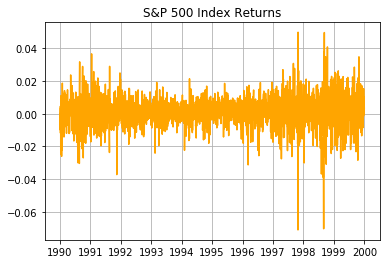

In [8]:
# Visualize FTSE 100 Index daily returns
plt.plot(returns, color='orange')
plt.title('S&P 500 Index Returns')
plt.grid(True)


<h2 id="Numerical-Optimization">Numerical Optimization<a class="anchor-link" href="#Numerical-Optimization">¶</a></h2><p>We will use Numerical optimization to maximize the likelihood estimation. Numerical optimization is typically implemented to find the minimum of a function rather than the maximum and the function to be minimize is called an objective function. For maximum likelihood estimation, we simply define a negative log likelihood as our objective function.</p>



<h3 id="GARCH">GARCH<a class="anchor-link" href="#GARCH">¶</a></h3><p>Advantage of using a GARCH method when compared to EWMA is the inclusion of long term variance or volatility as a forecasting feature.</p>


In [10]:
# GARCH(1,1) function
def garch(omega, alpha, beta, ret):
    
    length = len(ret)
    
    var = []
    for i in range(length):
        if i==0:
            var.append(omega/np.abs(1-alpha-beta))
        else:
            var.append(omega + alpha * ret[i-1]**2 + beta * var[i-1])
            
    return np.array(var)

In [11]:
garch(0.00000790570,0.1,0.8,returns)[:3]

array([7.90570000e-05, 7.11513000e-05, 6.54870136e-05])


<h3 id="Maximum-Likelihood-Estimation">Maximum Likelihood Estimation<a class="anchor-link" href="#Maximum-Likelihood-Estimation">¶</a></h3><p>Maximum Likeihood Estimation (MLE) is a statistical method used for fitting the data to a model. When using MLE, we first assume a distribution (ie., a parametric model) and then try to determine the model parameters. To estimate GARCH(1,1) parameters, we assume distribution of returns conditional on variance are normally distributed.</p>
<p>We maximize,</p>
$$
\sum_{i=1}^n log  \Bigg[ \frac1{\sqrt{2\pi\sigma_i^2}} \ e^\frac{-(u_i-\overline u)^2}{2\sigma_i^2} \Bigg]
$$<p>to derive $\omega$, $\alpha$ and $\beta$.</p>


In [12]:
# Log likelihood function
def likelihood(params, ret):
    
    length = len(ret)
    omega = params[0]
    alpha = params[1]
    beta = params[2]
    
    variance = garch(omega, alpha, beta, ret)
    
    llh = []
    for i in range(length):
        llh.append(np.log(norm.pdf(ret[i], 0, np.sqrt(variance[i]))))
    
    return -np.sum(np.array(llh))

In [13]:
likelihood((0.00000790570, 0.1, 0.8),returns)

-8540.382225783567


<h3 id="Optimization">Optimization<a class="anchor-link" href="#Optimization">¶</a></h3>



<p>Next, to optimize the GARCH parameters, we will use the <em><code>minimize</code></em> function from <code>scipy</code> optimization module. The objective function here is a function returning maximum log likelihood and the target variables are GARCH parameters.</p>
<p>Further, we use the <code>Nelder–Mead</code> method also known as downhill simplex method which is a commonly applied to numerical method to find the minimum or maximum of an objective function in a multidimensional space. The simplex algorithm is probably the simplest way to minimize a fairly well-behaved function. It requires only function evaluations and is a good choice for simple minimization problems. The downside to this method is it may take longer to find the minimum as it does not use any gradient evaluations.</p>


In [14]:
# Specify optimization input
param = ['omega', 'alpha', 'beta']
initial_values = (0.00000790570, 0.1,0.8)

In [15]:
res = minimize(likelihood, initial_values, args = returns, 
                   method='Nelder-Mead', options={'disp':False})

In [16]:
res

 final_simplex: (array([[4.65438215e-07, 4.88435228e-02, 9.46474229e-01],
       [4.65063741e-07, 4.87639127e-02, 9.46541931e-01],
       [4.66370864e-07, 4.88380272e-02, 9.46468659e-01],
       [4.67308946e-07, 4.89011789e-02, 9.46392665e-01]]), array([-8596.64590336, -8596.64589904, -8596.64589338, -8596.64585848]))
           fun: -8596.64590335503
       message: 'Optimization terminated successfully.'
          nfev: 135
           nit: 77
        status: 0
       success: True
             x: array([4.65438215e-07, 4.88435228e-02, 9.46474229e-01])

In [17]:
res['x']

array([4.65438215e-07, 4.88435228e-02, 9.46474229e-01])

In [18]:
# GARCH parameters
dict(zip(param,np.around(res['x']*100,4)))

{'omega': 0.0, 'alpha': 4.8844, 'beta': 94.6474}

In [19]:
# Parameters
omega = res['x'][0] 
alpha = res['x'][1]
beta = res['x'][2]

# Variance
var = garch(res['x'][0],res['x'][1],res['x'][2],returns)

# Annualised conditional volatility
ann_vol = np.sqrt(var*252) * 100
ann_vol

array([15.82720004, 15.43583318, 15.08301156, ..., 14.05045667,
       13.78742288, 13.45929364])


<h3 id="Visualize-Volatility">Visualize Volatility<a class="anchor-link" href="#Visualize-Volatility">¶</a></h3>


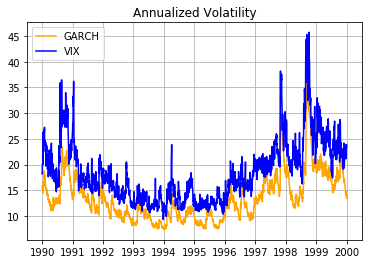

In [20]:
# Visualise GARCH volatility and VIX
plt.title('Annualized Volatility')
plt.plot(returns.index, ann_vol, color='orange', label='GARCH')
plt.plot(returns.index, df['VIX'], color='blue', label = 'VIX')
plt.legend(loc=2)
plt.grid(True)


<h3 id="N-day-Forecast">N-day Forecast<a class="anchor-link" href="#N-day-Forecast">¶</a></h3><p>Extending the GARCH(1,1) model to forecast future volatility, we can derive the n-days ahead forecast using the following equation.</p>
$$
E[\sigma^2_{n+k}] = \overline{\sigma}\space{^2} + (\alpha+\beta)^k * (\sigma^2_n - \overline{\sigma}\space{^2})
$$<p>where, $\overline{\sigma}\space{^2}$ is the long run variance and $\alpha$ and $\beta$ are GARCH parameters.</p>
<p>We know that volatility has the tendency to revert to its long run range. And, $\alpha + \beta < 1$ in GARCH(1,1) and hence when k gets larger, the second term gets smaller and the forecast tends towards the long term variance.</p>


In [21]:
# Calculate N-day forecast
longrun_variance = omega/(1-alpha-beta)
 
fvar = []
for i in range(1,732):    
    fvar.append(longrun_variance + (alpha+beta)**i * (var[-1] - longrun_variance))

var = np.array(fvar)

In [22]:
# Verify first 10 values
var[:10]

array([7.20147969e-05, 7.21430440e-05, 7.22706906e-05, 7.23977395e-05,
       7.25241936e-05, 7.26500556e-05, 7.27753282e-05, 7.29000143e-05,
       7.30241166e-05, 7.31476378e-05])

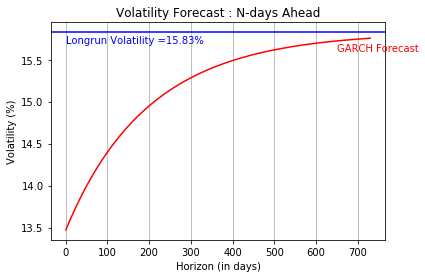

In [23]:
# Plot volatility forecast over different time horizon
plt.axhline(y=np.sqrt(longrun_variance*252)*100, color='blue')
plt.plot(np.sqrt(var*252)*100, color='red')

plt.xlabel('Horizon (in days)')
plt.ylabel('Volatility (%)')

plt.annotate('GARCH Forecast', xy=(650,15.60), color='red')
plt.annotate('Longrun Volatility =' + str(np.around(np.sqrt(longrun_variance*252)*100,2)) + '%', 
             xy=(0,15.70), color='blue')

plt.title('Volatility Forecast : N-days Ahead')
plt.grid(axis='x')


<h2 id="ARCH-Toolbox">ARCH Toolbox<a class="anchor-link" href="#ARCH-Toolbox">¶</a></h2><p>ARCH is one of the popular tools used for financial econometrics, written in Python - with Cython and/or Numba used to improve performance. We will now use <code>arch_model</code> to fit our GARCH model using this package.</p>


In [26]:
# Import arch library
from arch import arch_model

In [25]:
pip install arch

     |████████████████████████████████| 788kB 3.4MB/s eta 0:00:01
     |████████████████████████████████| 1.9MB 20.7MB/s eta 0:00:01
  Found existing installation: Cython 0.29.12
    Uninstalling Cython-0.29.12:
      Successfully uninstalled Cython-0.29.12
Note: you may need to restart the kernel to use updated packages.


In [27]:
# Mean zero
g1 = arch_model(returns, vol='GARCH', mean='Zero', p=1, o=0, q=1, dist='Normal')

In [28]:
model = g1.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: -8585.448810648937
Iteration:      2,   Func. Count:     14,   Neg. LLF: -8586.069358190143
Iteration:      3,   Func. Count:     20,   Neg. LLF: -8588.393939229207
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -8588.393940307446
            Iterations: 7
            Function evaluations: 20
            Gradient evaluations: 3


/Users/aq/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


In [29]:
# Model output
print(model)

                       Zero Mean - GARCH Model Results                        
Dep. Variable:                S&P 500   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                8588.39
Distribution:                  Normal   AIC:                          -17170.8
Method:            Maximum Likelihood   BIC:                          -17153.3
                                        No. Observations:                 2528
Date:                Wed, Aug 12 2020   Df Residuals:                     2525
Time:                        20:52:18   Df Model:                            3
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.6961e-06  1.577e-09   1075.827      0.000 [1.

In [30]:
# Model params
model.params

omega       0.000002
alpha[1]    0.090115
beta[1]     0.892040
Name: params, dtype: float64

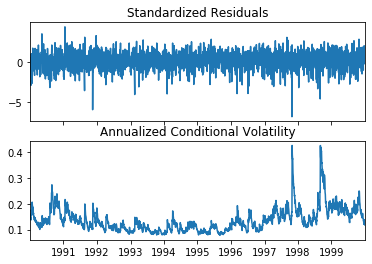

In [31]:
# Plot annualised vol
fig = model.plot(annualize='D')

In [33]:
model.conditional_volatility*np.sqrt(252)

DATE
1990-01-02    0.158414
1990-01-03    0.151040
1990-01-04    0.144663
1990-01-05    0.143631
1990-01-08    0.144926
1990-01-09    0.140148
1990-01-10    0.145378
1990-01-11    0.142389
1990-01-12    0.137087
1990-01-15    0.176553
1990-01-16    0.173017
1990-01-17    0.173017
1990-01-18    0.171258
1990-01-19    0.163445
1990-01-22    0.156347
1990-01-23    0.194158
1990-01-24    0.185390
1990-01-25    0.206352
1990-01-26    0.198028
1990-01-29    0.188208
1990-01-30    0.179126
1990-01-31    0.173314
1990-02-01    0.187551
1990-02-02    0.178374
1990-02-05    0.172636
1990-02-06    0.165214
1990-02-07    0.160205
1990-02-08    0.163970
1990-02-09    0.156629
1990-02-12    0.149822
                ...   
1999-11-18    0.172258
1999-11-19    0.170904
1999-11-22    0.163030
1999-11-23    0.155400
1999-11-24    0.158012
1999-11-26    0.156424
1999-11-29    0.149184
1999-11-30    0.145314
1999-12-01    0.153010
1999-12-02    0.149273
1999-12-03    0.147597
1999-12-06    0.162722
1999-1

In [34]:
# Constant mean
g2 = arch_model(returns, vol='GARCH', mean='Constant', p=1, o=0, q=1, dist='Normal')

In [35]:
# Model output
model2 = g2.fit(disp='off')
print(model2)

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                S&P 500   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                8598.87
Distribution:                  Normal   AIC:                          -17189.7
Method:            Maximum Likelihood   BIC:                          -17166.4
                                        No. Observations:                 2528
Date:                Wed, Aug 12 2020   Df Residuals:                     2524
Time:                        21:06:19   Df Model:                            4
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         7.4043e-04  8.991e-06     82.350      0.000 [7.

/Users/aq/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


In [36]:
# Forecast for next 60 days
model_forecast = model.forecast(horizon=60)

In [37]:
# Subsume forecast values into a dataframe
forecast_df = pd.DataFrame(np.sqrt(model_forecast.variance.dropna().T *252)*100)
forecast_df.columns = ['Cond_Vol']
forecast_df.head()

,Cond_Vol
h.01,11.411012
h.02,11.496164
h.03,11.579188
h.04,11.660155
h.05,11.739133


In [38]:
# long run variance from model forecast
lrv = model.params[0]/(1-model.params[1]-model.params[2])

# long run variance
np.sqrt(lrv*252)*100

15.476530711084429

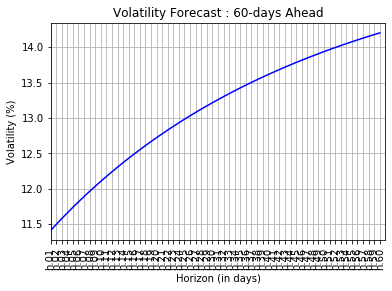

In [39]:
# Plot volatility forecast over a 60-day horizon
plt.plot(forecast_df, color='blue')
plt.xlim(0,60)
plt.xticks(rotation=90)
plt.xlabel('Horizon (in days)')
plt.ylabel('Volatility (%)')
plt.title('Volatility Forecast : 60-days Ahead');
plt.grid(True)


<h1 id="References">References<a class="anchor-link" href="#References">¶</a></h1><ul>
<li><p>Scipy documentation <a href="https://docs.scipy.org/doc/scipy/reference/">https://docs.scipy.org/doc/scipy/reference/</a></p>
</li>
<li><p>Arch documentation <a href="https://arch.readthedocs.io/en/latest/index.html">https://arch.readthedocs.io/en/latest/index.html</a></p>
</li>
</ul>
